<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


In [5]:
#Encontrar raíces mediasecantente librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

In [6]:
theta=lambda x: x-np.sin(x)-np.pi/2
dtheta=lambda x: 1 - np.cos(x)

In [7]:
x=np.arange(0,2*np.pi, 0.01)
y=theta(x)  #variar theta iterativamente

In [8]:
d={'Theta':x,'Función':y}#serie
df=pd.DataFrame(d)  #data frame

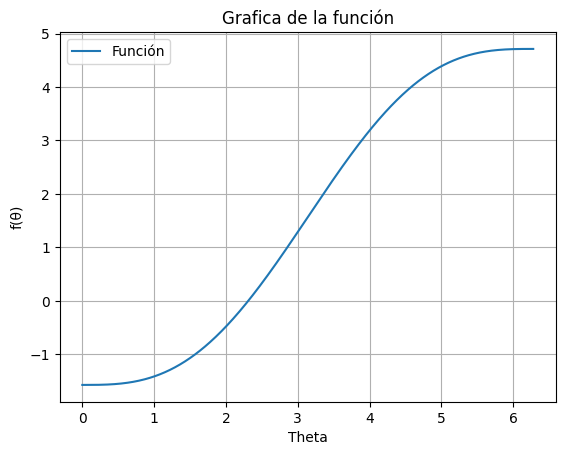

In [9]:
df.plot.line(x='Theta',y='Función')
plt.title('Grafica de la función')
plt.ylabel('f(θ)')
plt.legend()
plt.grid()
plt.show()

In [11]:
#encontrar las raíces de la función
#dentro del dataframe se puede hacer un filro para buscar los valores cercanos al cero
df_filtro=df[df.Función.between(-0.1,0.1)]
df_filtro

,Theta,Función
225,2.25,-0.098870
226,2.26,-0.082549
227,2.27,-0.066151
228,2.28,-0.049677
229,2.29,-0.033127
230,2.30,-0.016502
231,2.31,0.000198
232,2.32,0.016972
233,2.33,0.033819
234,2.34,0.050739


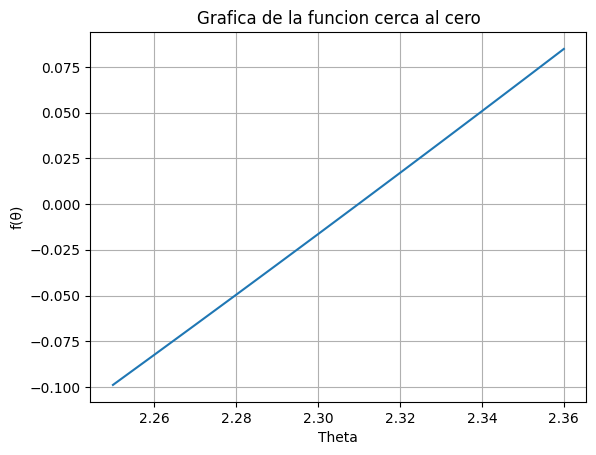

In [14]:
plt.plot(df_filtro['Theta'],df_filtro['Función']) #a ojo podemos ver donde está el cero de la función
plt.title('Grafica de la funcion cerca al cero')
plt.xlabel('Theta')
plt.ylabel('f(θ)')
plt.grid()
plt.show()

In [ ]:
#Método bisección
optimize.bisect?

In [ ]:
raiz=optimize.bisect(theta,2.30,2.31)  #función #intervalo  #siempre se debe evaluar el intervalo en un cambio de signo

In [ ]:
print('La raíz usando el método de bisección es', raiz)

La raíz usando el método de bisección es 2.3098814600089104


In [ ]:
#Método de Newton-Rhapson
optimize.newton? #se necesita la primera derivada

In [ ]:
raiz_newton=optimize.newton(theta,2.30,dtheta)

In [ ]:
print('La raíz usando el método de Newton-Rhapson es', raiz_newton)

La raíz usando el método de Newton-Rhapson es 2.309881460010057


In [ ]:
#Método del punto-fijo

optimize.fixed_point?

In [ ]:
fixed_theta=lambda x: x-theta(x)

In [ ]:
raiz_fijo=optimize.fixed_point(fixed_theta,2.30) #recursividad al rededor de un punto

In [ ]:
print('La raíz usando el método de Punto-fijo es', raiz_fijo)

La raíz usando el método de Punto-fijo es 2.3098814600100575


In [ ]:
#Método de secante  #mismo método de newton, no es necesario meterle la derivada
raiz_secante=optimize.newton(theta,2.30)
print('La raíz usando el método de la secante es', raiz_secante)

La raíz usando el método de la secante es 2.3098814600100575


*2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground*

- *Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.*


In [16]:
def s(t,s0=300,g=32.17,m=0.25,k=0.1):
  s=s0-m*g*t/k+m**2*g*t*(1-np.exp(-k*t/m))/k
  return s

def ds(t,s0=300,g=32.17,m=0.25,k=0.1):
  ds=-m*g/k+m**2*g*(1-np.exp(-k*t/m))/k + m**2*g*(k/m*np.exp(-k*t/m))/k
  return ds

In [17]:
x=np.arange(0,2*np.pi, 0.01)
y=s(x)  #variar s iterativamente

In [18]:
data={'s(t)':x,'Función':y}#serie
df1=pd.DataFrame(data)  #data frame

In [19]:
df1

,s(t),Función
0,0.00,300.000000
1,0.01,299.196553
2,0.02,298.394704
3,0.03,297.594445
4,0.04,296.795766
...,...,...
624,6.24,-86.728907
625,6.25,-87.307322
626,6.26,-87.885770
627,6.27,-88.464250


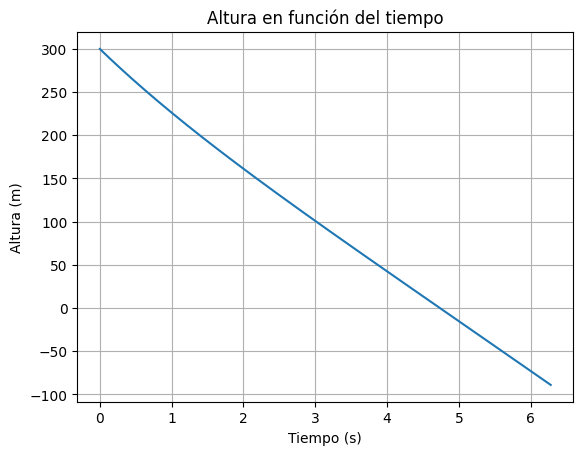

In [22]:
plt.plot(df1['s(t)'],df1['Función'])
plt.title('Altura en función del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)')
plt.grid()

In [ ]:
df1_filtro=df1[df1.Función.between(-0.5,0.5)]
df1_filtro

,s(t),Función
473,4.73,0.353702
474,4.74,-0.222439


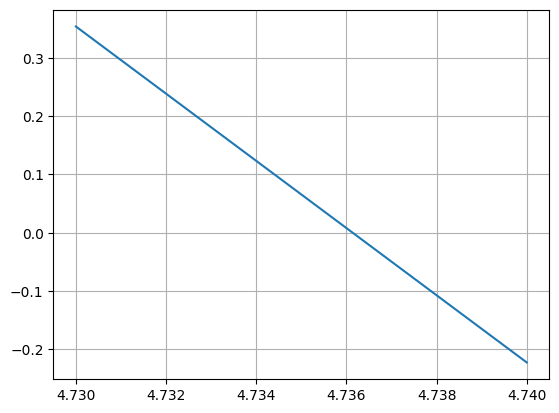

In [ ]:
plt.plot(df1_filtro['s(t)'],df1_filtro['Función']) #a ojo podemos ver donde está el cero de la función
plt.grid()
plt.show()

In [ ]:
#Método bisección
raiz_bisec=optimize.bisect(s,4.73,4.74)
print('La raíz usando el método de bisección es', raiz_bisec)

La raíz usando el método de bisección es 4.736139137604041


In [ ]:
#Método Newton-Rhapson
raiz_newton=optimize.newton(s, 4.73, ds)
print('La raíz usando el método de Newton-Rhapson es', raiz_newton)

La raíz usando el método de bisección es 4.736139136693723


In [ ]:
#Método Secante
raiz_secante=optimize.newton(s, 4.73)
print('La raíz usando el método de la secante es', raiz_secante)

La raíz usando el método de la secante es 4.73613913760349


In [ ]:
#Método Punto_fijo =punto-funcion evaluada en ese punto
fixed_s=lambda t: t-s(t)
raiz_fijo=optimize.fixed_point(fixed_s,4.73)
print('La raíz usando el método del punto fijo es', raiz_fijo)

La raíz usando el método del punto fijo es 4.73613913760349


3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5.






In [23]:
def M(m,T):
  M = m - np.tanh(m/T)
  return M

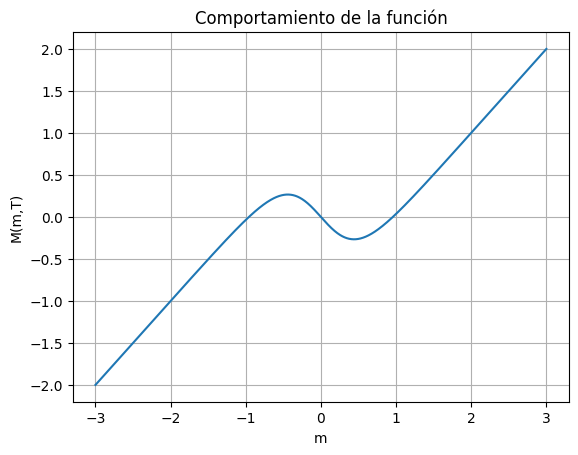

In [28]:
T=0.5
# Graficamos nuestra funcion para tener una idea de donde estan los ceros y asi usar un x0 adecuado
x = np.linspace(-3, 3, 1000)

plt.title('Comportamiento de la función')
plt.plot(x, M(x,T))
plt.xlabel('m')
plt.ylabel('M(m,T)')
plt.grid()

In [ ]:
x=x
y=M(x,T)
data2={'s(t)':x,'Función':y}
df2=pd.DataFrame(data2)
df2

*a. La magnetización reducida empleando el metodo de la secante (Muestre su resultado con 4 cifras)*

Podemos ver que la función tiene tres ceros

In [44]:
raiz1 = optimize.newton(M, -0.95, args = (T,))
raiz2 = optimize.newton(M, -0.003, args = (T,))
raiz3 = optimize.newton(M, 60, args = (T,))

print(f'La magnetizacion reducida para T=0.05 es: [{raiz1:.4}, {raiz2:.4}, {raiz3:.4}]')

La magnetizacion reducida para T=0.05 es: [-0.9575, 2.375e-25, 0.9575]


b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

In [46]:
g = lambda x,T: x - M(x,T)

raiz_fixed1 = optimize.fixed_point(g, -0.95, args = (T,))
raiz_fixed2 = optimize.fixed_point(g, -0.003, args = (T,))
raiz_fixed3 = optimize.fixed_point(g, 60, args = (T,))

print(f'La magnetizacion reducida reducida para T=0.05 es: [{raiz_fixed1:.4}, {raiz_fixed2:.4}, {raiz_fixed3:.4}]')

La magnetizacion reducida reducida para T=0.05 es: [-0.9575, 0.0, 0.9575]


c. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

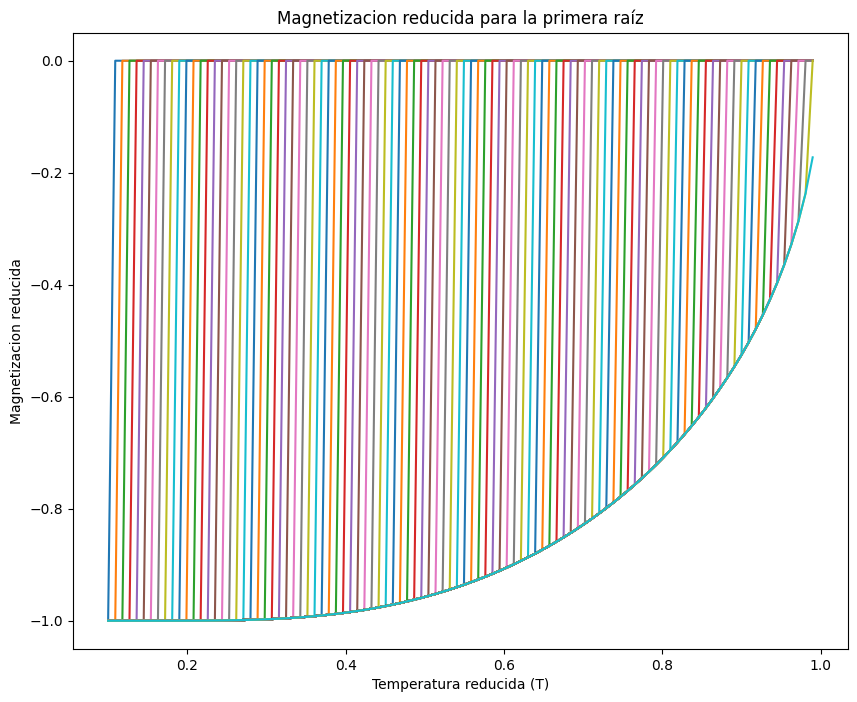

In [67]:
T1 = np.linspace(0.1, 0.99, 100)
m = np.zeros_like(T1)

plt.figure(figsize=(10,8))
cont = 0
for i in T1:
  m[cont] = optimize.newton(M, -0.95, args = (i,))
  cont += 1

  plt.title('Magnetizacion reducida para la primera raíz')
  plt.plot(T1, m)
  plt.xlabel('Temperatura reducida (T)')
  plt.ylabel('Magnetizacion reducida')
  plt.grid()

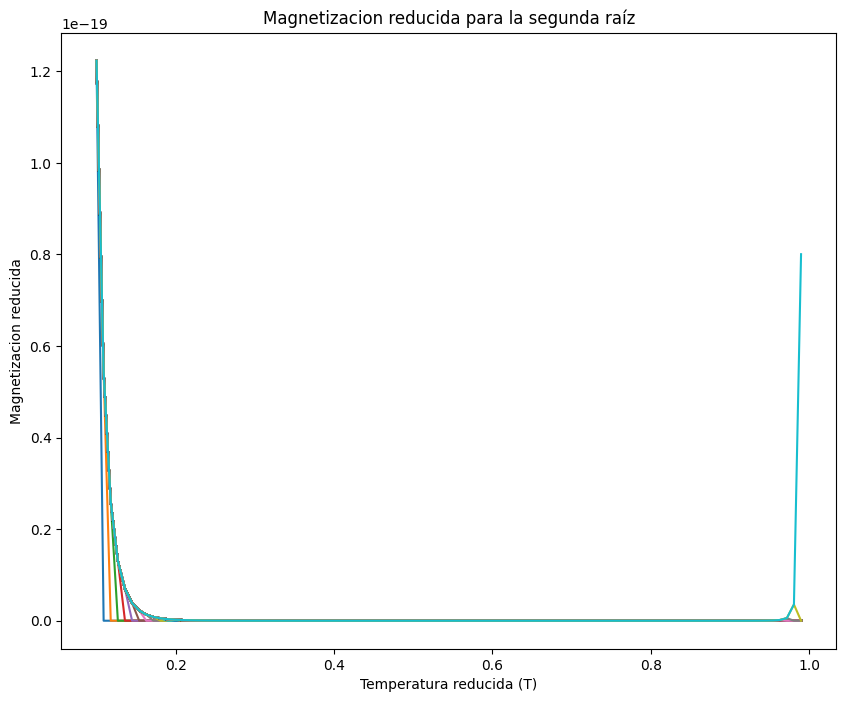

In [65]:
T1 = np.linspace(0.1, 0.99, 100)
m = np.zeros_like(T1)

plt.figure(figsize=(10,8))
cont = 0
for i in T1:
  m[cont] = optimize.newton(M, -0.003, args = (i,))
  cont += 1

  plt.title('Magnetizacion reducida para la segunda raíz')
  plt.plot(T1, m)
  plt.xlabel('Temperatura reducida (T)')
  plt.ylabel('Magnetizacion reducida')
  plt.grid()

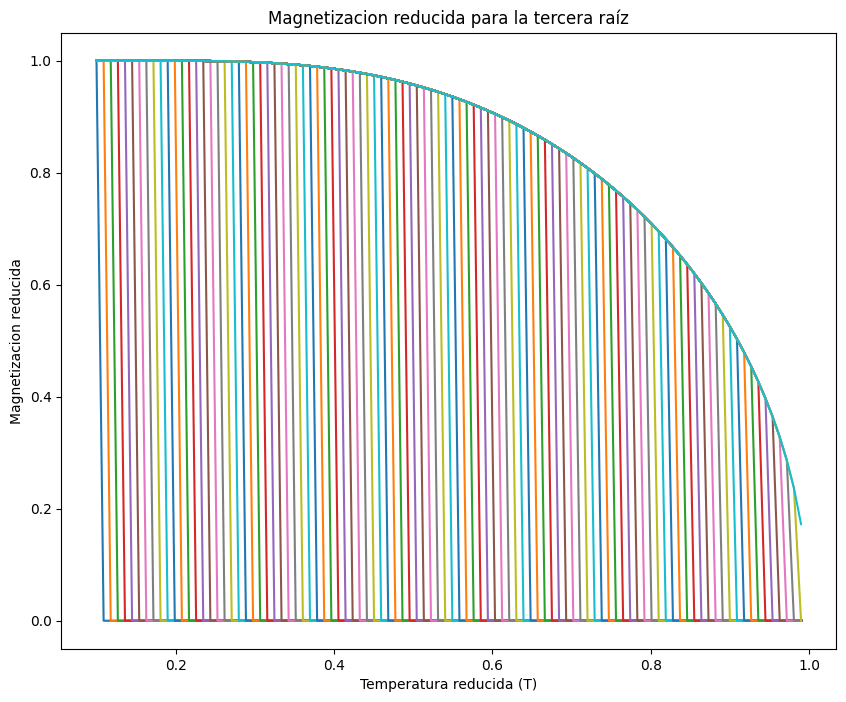

In [68]:
T1 = np.linspace(0.1, 0.99, 100)
m = np.zeros_like(T1)

plt.figure(figsize=(10,8))
cont = 0
for i in T1:
  m[cont] = optimize.newton(M, 60, args = (i,))
  cont += 1

  plt.title('Magnetizacion reducida para la tercera raíz')
  plt.plot(T1, m)
  plt.xlabel('Temperatura reducida (T)')
  plt.ylabel('Magnetizacion reducida')
  plt.grid()

5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

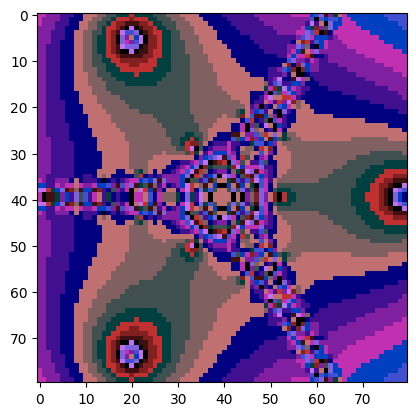

In [73]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)